## Model Training

#### import data and required packages

In [1]:
pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.2/26.2 MB 22.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 23.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 21.7 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 13.9 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [5]:
df = pd.read_csv("/Users/nikhilthorat/Documents/ML_project/notebook/data/StudentsPerformance.csv")

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [7]:
X = df.drop(columns=['math score'],axis=1)

In [8]:
print("Unique categories in 'Gender' column: ",end = " ")
print(df['gender'].unique())

print("Unique categories in 'race/ethnicity ' column: ",end = " ")
print(df['race/ethnicity'].unique())

print("Unique categories in 'parental level of education' column: ",end = " ")
print(df['parental level of education'].unique())

print("Unique categories in 'lunch' column: ",end = " ")
print(df['lunch'].unique())

print("Unique categories in 'test preparation course' column: ",end = " ")
print(df['test preparation course'].unique())


Unique categories in 'Gender' column:  ['female' 'male']
Unique categories in 'race/ethnicity ' column:  ['group B' 'group C' 'group A' 'group D' 'group E']
Unique categories in 'parental level of education' column:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Unique categories in 'lunch' column:  ['standard' 'free/reduced']
Unique categories in 'test preparation course' column:  ['none' 'completed']


In [9]:
y = df['math score']

In [10]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [11]:
numerical_features = X.select_dtypes(exclude = "object").columns
categorical_features = X.select_dtypes(include ='object').columns

numerical_features

Index(['reading score', 'writing score'], dtype='object')

In [12]:
categorical_features

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [13]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer


numerical_scaler = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer([
    ("OneHotEncoder",oh_transformer,categorical_features),
("StandardScaler",numerical_scaler,numerical_features)

])

In [14]:
X.shape

(1000, 7)

In [15]:
X = preprocessor.fit_transform(X)
X.shape

(1000, 19)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((800, 19), (800,), (200, 19), (200,))

In [17]:
def evaluate_model(true,predicted):
    mse = mean_squared_error(true,predicted)
    mae = mean_absolute_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted) 
    return mae,rmse,r2_square

In [18]:
models = {
    "Linear Regression":LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "catBoosting Regressor" : CatBoostRegressor(verbose = False),
    "AdaBoost Regressor" : AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    
    #predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    y_train_mae,y_train_rmse,y_train_r2_square = evaluate_model(y_train,y_train_pred)
    y_test_mae,y_test_rmse,y_test_r2_square = evaluate_model(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("model performance for training set")
    print("- root mean square error: {0:.4f}".format(y_train_rmse))
    print("- mean absolute error : {0:.4f}".format(y_train_mae))
    print("- r2_square :{0:.4f}".format(y_train_r2_square))
    
    print("--------------------------------------")
    
    print("model performance for test set")
    print("- root mean square error: {0:.4f}".format(y_test_rmse))
    print("- mean absolute error : {0:.4f}".format(y_test_mae))
    print("- r2_square :{0:.4f}".format(y_test_r2_square))
    r2_list.append(y_test_r2_square)
    
    print("="*35)
    print("\n")

Linear Regression
model performance for training set
- root mean square error: 5.3242
- mean absolute error : 4.2684
- r2_square :0.8743
--------------------------------------
model performance for test set
- root mean square error: 5.4011
- mean absolute error : 4.2176
- r2_square :0.8801


Lasso
model performance for training set
- root mean square error: 6.5938
- mean absolute error : 5.2063
- r2_square :0.8071
--------------------------------------
model performance for test set
- root mean square error: 6.5197
- mean absolute error : 5.1579
- r2_square :0.8253


Ridge
model performance for training set
- root mean square error: 5.3233
- mean absolute error : 4.2650
- r2_square :0.8743
--------------------------------------
model performance for test set
- root mean square error: 5.3904
- mean absolute error : 4.2111
- r2_square :0.8806


K-Neighbors Regressor
model performance for training set
- root mean square error: 5.7079
- mean absolute error : 4.5168
- r2_square :0.8555
----

In [19]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880118
7,catBoosting Regressor,0.851632
5,Random Forest Regressor,0.850892
8,AdaBoost Regressor,0.847886
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.744327


### Linear Regression Model

In [20]:
lin_model = LinearRegression()
lin_model = lin_model.fit(X_train,y_train)
pred_y = lin_model.predict(X_test)
score = r2_score(y_test,pred_y)*100

print("accuracy of the model is %.2f"%score)

accuracy of the model is 88.01


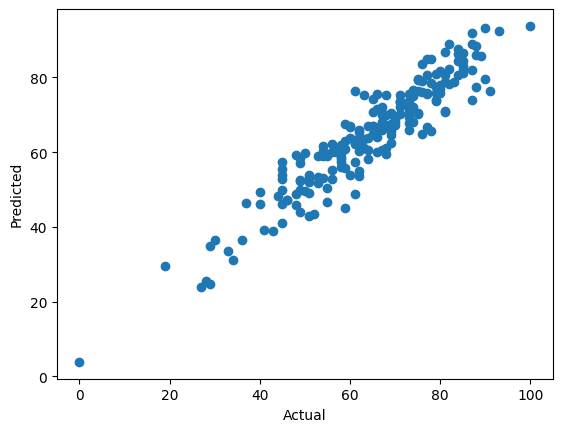

In [21]:
plt.scatter(y_test,pred_y);
plt.xlabel('Actual');
plt.ylabel('Predicted');

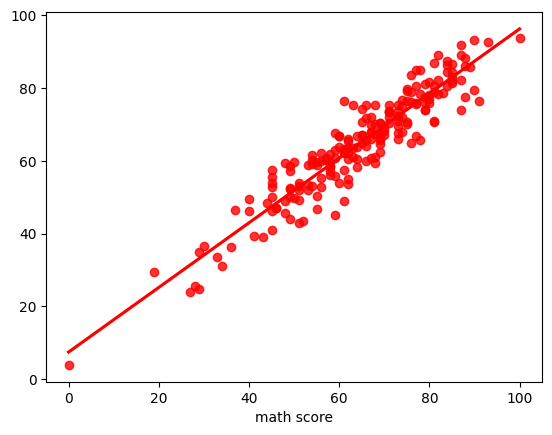

In [22]:
sns.regplot(x=y_test,y=pred_y,ci=None,color ='red');